# How Label Image for create a Model

The most flexible data labeling platform to fine-tune LLMs, prepare training data or validate AI models. 
https://labelstud.io/

    - Install in the terminal "pip install label-studio"

A continuacion para iniciar el etiquetado usa:
    - "label-studio start"

On the plataform you must to label and organize the image according your ideas

After finish you have to pick up in export and next step is select the format o how you want the files:

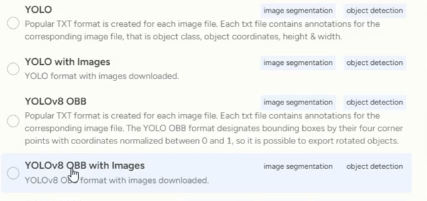

You have to extrac all images in the file wich one you're working and use the next code for separete between validation, test and training.

In [2]:
import os
import shutil
import random

In [5]:

# Define paths
base_dir = "Helmetsandvests"
images_dir = os.path.join(base_dir, "images")
labels_dir = os.path.join(base_dir, "labels")

# Create destination directories
splits = ["train", "test", "val"]
for split in splits:
    os.makedirs(os.path.join(base_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, split, "labels"), exist_ok=True)

# Get list of image files and pair them with their labels
images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
images.sort()  # Sort to ensure consistent matching
random.shuffle(images)  # Shuffle randomly

# Define proportions
# 70% Train
# 20% Test
# 10% Validation
total = len(images)
train_split = int(0.7 * total)
test_split = int(0.2 * total)

train_images = images[:train_split]
test_images = images[train_split:train_split + test_split]
val_images = images[train_split + test_split:]

# Function to move files
def move_files(images_list, split):
    for img_file in images_list:
        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_file)

        # Move image
        if os.path.exists(img_path):
            shutil.move(img_path, os.path.join(base_dir, split, "images", img_file))

        # Move label
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(base_dir, split, "labels", label_file))

# Move files to each set
move_files(train_images, "train")
move_files(test_images, "test")
move_files(val_images, "val")

print("Dataset successfully split into train, test, and val.")

Dataset successfully split into train, test, and val.


**We must to create a file ".yaml" ...**

Therefore we create a file in our repository

ALWAYS BE CAREFUL OF THE PATH, IF SOMETHING IS WRONG FISRT CHECK THE PATH O DIRECTORY WHERE COME FROM THE FILES.